In [1]:
import pandas as pd
import scipy as sp

from abtools.bayesian import BinaryABModel

%matplotlib inline

In [2]:
p = .01
size = 50000
delta_true = .05

y1 = pd.Series(sp.stats.bernoulli.rvs(p=p, size=size, random_state=8228))
y2 = pd.Series(sp.stats.bernoulli.rvs(p=p*(1+delta_true), size=size, random_state=8228))

print('Mean: %.4f, std: %.2f' % (y1.mean(), y1.std()))
print('Mean: %.4f, std: %.2f' % (y2.mean(), y2.std()))
print('y2 больше y1 на %.4f = %d%%' % (y2.mean()- y1.mean(), (y2.mean()/y1.mean()-1)*100))

Mean: 0.0104, std: 0.10
Mean: 0.0110, std: 0.10
y2 больше y1 на 0.0006 = 5%


In [3]:
model = BinaryABModel(y1, y2)
model.fit()

/usr/local/lib/python3.5/dist-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"
/usr/local/lib/python3.5/dist-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


         Current function value: 5919.064988
         Iterations: 17
         Function evaluations: 151
         Gradient evaluations: 138


100%|██████████| 10000/10000 [00:06<00:00, 1431.44it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4883c3dd8>], dtype=object)

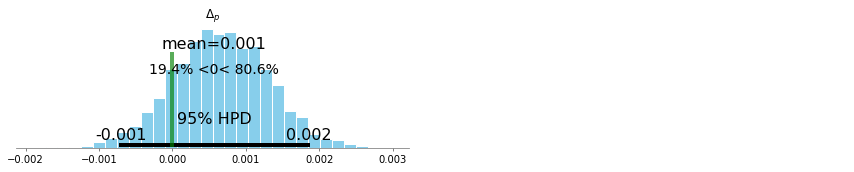

In [4]:
model.plot_deltas()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa480de28d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa480dae278>], dtype=object)

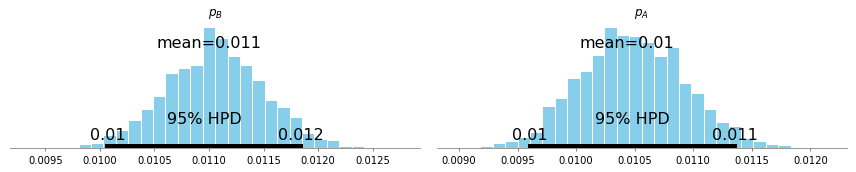

In [5]:
model.plot_params()